Projetc

In [9]:
import math
import sys, os
import numpy as np
import pandas as pd
import openpyxl 
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [10]:

sys.path.append(os.path.abspath(os.path.join('modulos')))
from estrategia1 import * # o Asteriscos importa tudo que estra dentro no Modulo! 
from estrategia2 import * # o Asteriscos importa tudo que estra dentro no Modulo! 
from estrategia3 import * # o Asteriscos importa tudo que estra dentro no Modulo! 
from openpyxl import load_workbook


In [11]:
pd.set_option('display.max_columns', 50)

## Carregando os Dados

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [13]:
# Criamos uma lista para identificar valores ausentes
lista_labels_valores_ausentes = ["n/a", "na", "NaN", "undefined"]

In [14]:
# Criamos uma lista para identificar valores ausentes
dataset = pd.read_csv('DashboardGestaoObra.csv', sep=';', na_values=func_calc_percentual_valores_ausentes)


In [15]:
dataset.shape

(487, 12)

In [16]:
dataset.head()

,Tarefa,Quant. planejada,Unidade,Duração (dias),Início,Término,Previsto,Valor previsto,Medido,Valor medido,IDP,Status
0,1 - OBRA DE INFRAESTRUTURA,NaN,NaN,638.0,03/04/2023,30/09/2025,"90,75%","R$ 16.830.985,15","92,81%","R$ 17.212.824,78","1,02",Em dia
1,2 - ADMINISTRAÇÃO DA OBRA,NaN,NaN,107.0,01/06/2023,31/10/2023,"100,00%","R$ 687.889,44","100,00%","R$ 687.889,44","1,00",Concluído
2,3 - EQUIPE DE CAMPO,NaN,NaN,107.0,01/06/2023,31/10/2023,"100,00%","R$ 687.889,44","100,00%","R$ 687.889,44","1,00",Concluído
3,4 - Gerente de obra (GO),"6,0000",vb,107.0,01/06/2023,31/10/2023,"100,00%","R$ 196.939,44","100,00%","R$ 196.939,44","1,00",Concluído
4,5 - Mestre de obras,"6,0000",vb,107.0,01/06/2023,31/10/2023,"100,00%","R$ 185.986,38","100,00%","R$ 185.986,38","1,00",Concluído


## Análise Exploratória

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tarefa            487 non-null    object 
 1   Quant. planejada  351 non-null    object 
 2   Unidade           351 non-null    object 
 3   Duração (dias)    486 non-null    float64
 4   Início            486 non-null    object 
 5   Término           486 non-null    object 
 6   Previsto          487 non-null    object 
 7   Valor previsto    379 non-null    object 
 8   Medido            487 non-null    object 
 9   Valor medido      331 non-null    object 
 10  IDP               487 non-null    object 
 11  Status            487 non-null    object 
dtypes: float64(1), object(11)
memory usage: 45.8+ KB


In [19]:
dataset.describe()

,Duração (dias)
count,486.000000
mean,255.897119
std,167.683679
min,6.000000
25%,107.000000
50%,255.500000
75%,354.000000
max,816.000000


In [20]:
dataset.shape

(487, 12)

In [21]:
dataset.columns.tolist()

['Tarefa',
 'Quant. planejada',
 'Unidade',
 'Duração (dias)',
 'Início',
 'Término',
 'Previsto',
 'Valor previsto',
 'Medido',
 'Valor medido',
 'IDP',
 'Status']

In [22]:
# Verifica o percentual de valores ausentes
# Função do módulo estratégia 1
func_calc_percentual_valores_ausentes(dataset)

O dataset tem 9.22 % de valores ausentes.


In [23]:
# Cria tabela com valores ausentes
df_missing = func_calc_percentual_valores_ausentes_coluna(dataset)

O dataset tem 12 colunas.
Encontrado: 7 colunas que têm valores ausentes.


In [24]:
df_missing

,Valores Ausentes,% de Valores Ausentes,Dtype
Valor medido,156,32.03,object
Quant. planejada,136,27.93,object
Unidade,136,27.93,object
Valor previsto,108,22.18,object
Duração (dias),1,0.21,float64
Início,1,0.21,object
Término,1,0.21,object


In [25]:
colunas_para_remover = df_missing[df_missing['% de Valores Ausentes'] >= 30.00].index.tolist()

In [26]:
colunas_para_remover

['Valor medido']

In [27]:
colunas_para_remover = [col for col in colunas_para_remover if col not in ['Valor medido']]

In [28]:
colunas_para_remover

[]

In [29]:
dataset_clean = dataset.drop(colunas_para_remover, axis = 1)

In [30]:
dataset_clean.shape

(487, 12)

In [31]:
func_calc_percentual_valores_ausentes(dataset_clean)

O dataset tem 9.22 % de valores ausentes.


In [32]:
func_calc_percentual_valores_ausentes_coluna(dataset_clean)

O dataset tem 12 colunas.
Encontrado: 7 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
Valor medido,156,32.03,object
Quant. planejada,136,27.93,object
Unidade,136,27.93,object
Valor previsto,108,22.18,object
Duração (dias),1,0.21,float64
Início,1,0.21,object
Término,1,0.21,object


In [33]:
df = dataset_clean.head()

In [34]:
dataset_clean.head()

,Tarefa,Quant. planejada,Unidade,Duração (dias),Início,Término,Previsto,Valor previsto,Medido,Valor medido,IDP,Status
0,1 - OBRA DE INFRAESTRUTURA,NaN,NaN,638.0,03/04/2023,30/09/2025,"90,75%","R$ 16.830.985,15","92,81%","R$ 17.212.824,78","1,02",Em dia
1,2 - ADMINISTRAÇÃO DA OBRA,NaN,NaN,107.0,01/06/2023,31/10/2023,"100,00%","R$ 687.889,44","100,00%","R$ 687.889,44","1,00",Concluído
2,3 - EQUIPE DE CAMPO,NaN,NaN,107.0,01/06/2023,31/10/2023,"100,00%","R$ 687.889,44","100,00%","R$ 687.889,44","1,00",Concluído
3,4 - Gerente de obra (GO),"6,0000",vb,107.0,01/06/2023,31/10/2023,"100,00%","R$ 196.939,44","100,00%","R$ 196.939,44","1,00",Concluído
4,5 - Mestre de obras,"6,0000",vb,107.0,01/06/2023,31/10/2023,"100,00%","R$ 185.986,38","100,00%","R$ 185.986,38","1,00",Concluído


In [35]:
df.columns

Index(['Tarefa', 'Quant. planejada', 'Unidade', 'Duração (dias)', 'Início',
       'Término', 'Previsto', 'Valor previsto', 'Medido', 'Valor medido',
       'IDP', 'Status'],
      dtype='object')

In [36]:
dict = list(df.columns.values)[3:12]

In [37]:
# Use a variável dict no método get_dummies
df = pd.get_dummies(df, columns=dict, drop_first=True)

# Exibe o DataFrame resultante
print(df)

                       Tarefa Quant. planejada Unidade  Duração (dias)_638.0  \
0  1 - OBRA DE INFRAESTRUTURA              NaN     NaN                  True   
1   2 - ADMINISTRAÇÃO DA OBRA              NaN     NaN                 False   
2         3 - EQUIPE DE CAMPO              NaN     NaN                 False   
3    4 - Gerente de obra (GO)           6,0000      vb                 False   
4         5 - Mestre de obras           6,0000      vb                 False   

   Início_03/04/2023  Término_31/10/2023  Previsto_90,75%  \
0               True               False             True   
1              False                True            False   
2              False                True            False   
3              False                True            False   
4              False                True            False   

   Valor previsto_R$ 185.986,38  Valor previsto_R$ 196.939,44  \
0                         False                         False   
1                     

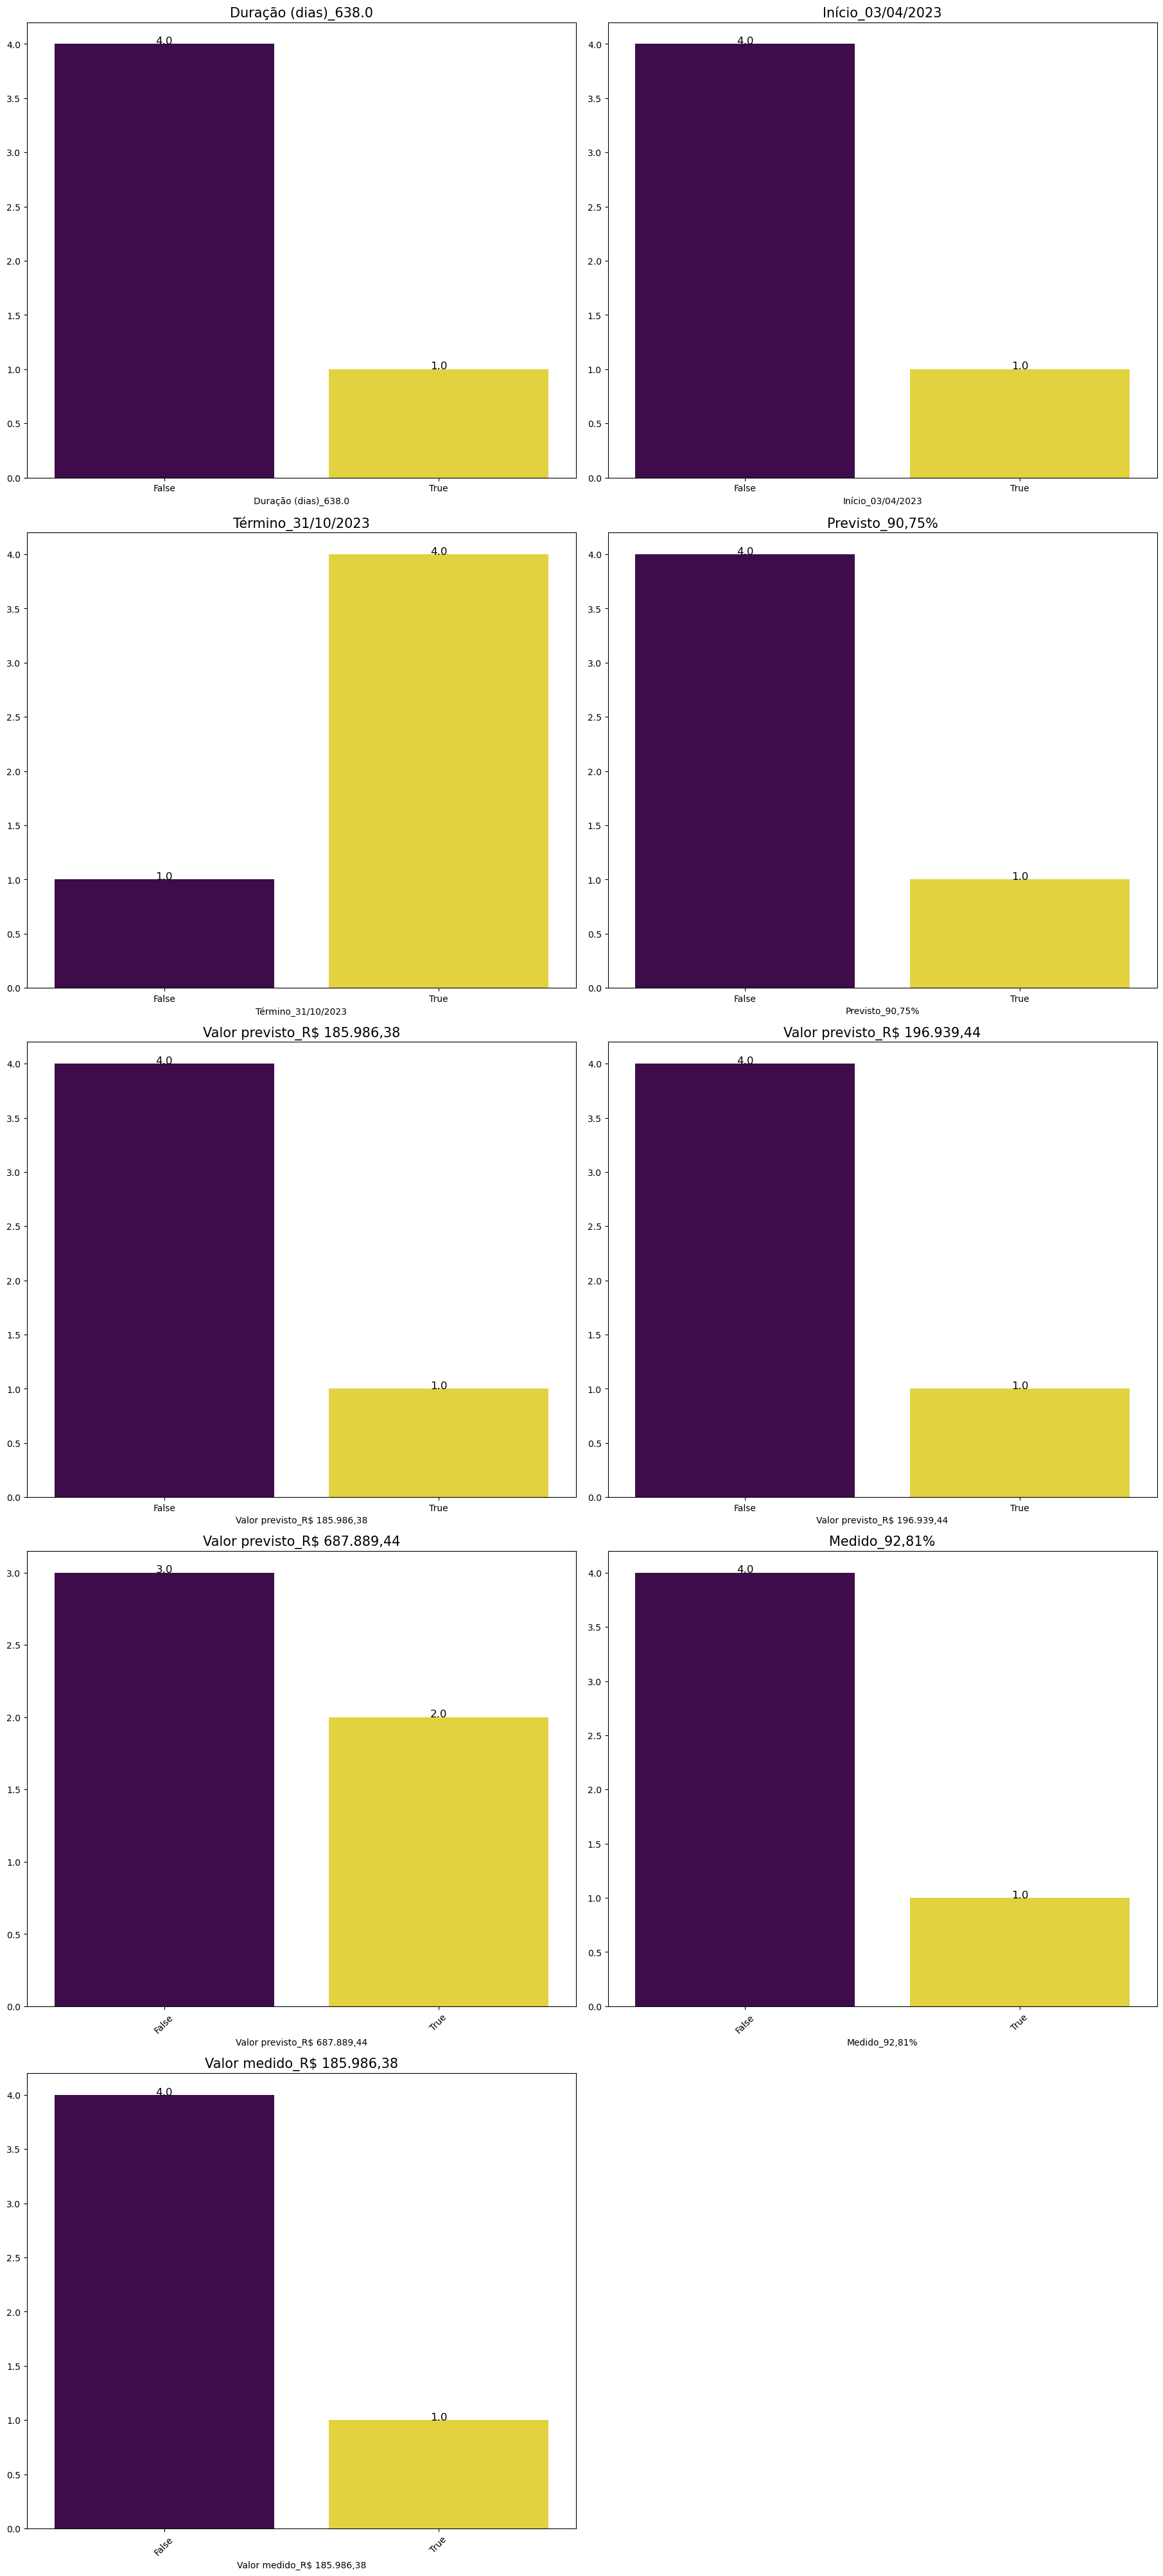

In [38]:

# Tamanho da figura (aumentado para evitar o erro)
fig = plt.figure(figsize=(18, 40), constrained_layout=True)  

# Lista de colunas
column_list = list(df.columns.values)[3:12]

# Contador
A = 0

# Loop para criar os gráficos
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    
    # Conta a frequência dos valores na coluna
    value_counts = df[i].fillna('NaN').value_counts()
    
    # Converte o mapa de cores para lista
    colors = cm.viridis(np.linspace(0, 1, len(value_counts))).tolist()
    
    # Plota o gráfico com as cores personalizadas
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, hue=value_counts.index, legend=False)
    
    # Título do gráfico
    plt.title(i, fontsize=15)
    
    # Adiciona os valores acima das barras
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', color='black', size=12)
    
    # Rotação dos rótulos do eixo X para melhorar a leitura
    if A >= 7:
        plt.xticks(rotation=45)

# Mostra o gráfico
plt.show()

In [39]:
print(df.columns)


Index(['Tarefa', 'Quant. planejada', 'Unidade', 'Duração (dias)_638.0',
       'Início_03/04/2023', 'Término_31/10/2023', 'Previsto_90,75%',
       'Valor previsto_R$ 185.986,38', 'Valor previsto_R$ 196.939,44',
       'Valor previsto_R$ 687.889,44', 'Medido_92,81%',
       'Valor medido_R$ 185.986,38', 'Valor medido_R$ 196.939,44',
       'Valor medido_R$ 687.889,44', 'IDP_1,02', 'Status_Em dia'],
      dtype='object')


In [40]:
df.columns = df.columns.str.strip()  # Remove espaços extras
df.columns = df.columns.str.replace('ã', 'a').str.replace('ç', 'c')  # Remova acentos se necessário


In [41]:
colunas_para_converter = ['Quant. planejada', 'Duracao (dias)', 'Valor previsto', 'Medido', 'Valor medido', 'IDP']


In [42]:
for coluna in colunas_para_converter:
    if coluna in df.columns:
        df[coluna] = pd.to_numeric(df[coluna], errors='coerce')
    else:
        print(f"A coluna '{coluna}' não foi encontrada no DataFrame.")


A coluna 'Duracao (dias)' não foi encontrada no DataFrame.
A coluna 'Valor previsto' não foi encontrada no DataFrame.
A coluna 'Medido' não foi encontrada no DataFrame.
A coluna 'Valor medido' não foi encontrada no DataFrame.
A coluna 'IDP' não foi encontrada no DataFrame.


In [43]:
print(df.columns.tolist())


['Tarefa', 'Quant. planejada', 'Unidade', 'Duracao (dias)_638.0', 'Início_03/04/2023', 'Término_31/10/2023', 'Previsto_90,75%', 'Valor previsto_R$\xa0185.986,38', 'Valor previsto_R$\xa0196.939,44', 'Valor previsto_R$\xa0687.889,44', 'Medido_92,81%', 'Valor medido_R$\xa0185.986,38', 'Valor medido_R$\xa0196.939,44', 'Valor medido_R$\xa0687.889,44', 'IDP_1,02', 'Status_Em dia']


In [44]:
import re

# Dicionário para mapear nomes antigos para novos
colunas_corrigidas = {}
for col in df.columns:
    nome_limpo = re.sub(r'_[^_]+$', '', col)  # Remove o sufixo após o último "_"
    nome_limpo = nome_limpo.replace('R$\xa0', '').strip()  # Remove "R$" e espaços extras
    colunas_corrigidas[col] = nome_limpo

# Renomeia as colunas
df.rename(columns=colunas_corrigidas, inplace=True)

# Mostra os novos nomes das colunas
print(df.columns.tolist())


['Tarefa', 'Quant. planejada', 'Unidade', 'Duracao (dias)', 'Início', 'Término', 'Previsto', 'Valor previsto', 'Valor previsto', 'Valor previsto', 'Medido', 'Valor medido', 'Valor medido', 'Valor medido', 'IDP', 'Status']


In [45]:
print(df.columns.tolist())


['Tarefa', 'Quant. planejada', 'Unidade', 'Duracao (dias)', 'Início', 'Término', 'Previsto', 'Valor previsto', 'Valor previsto', 'Valor previsto', 'Medido', 'Valor medido', 'Valor medido', 'Valor medido', 'IDP', 'Status']


In [85]:
df.head()

,Tarefa,Quant. planejada,Unidade,Duracao (dias),Início,Término,Previsto,Valor previsto,Valor previsto,Valor previsto,Medido,Valor medido,Valor medido,Valor medido,IDP,Status
0,1 - OBRA DE INFRAESTRUTURA,NaN,NaN,True,True,False,True,False,False,False,True,False,False,False,True,True
1,2 - ADMINISTRAÇÃO DA OBRA,NaN,NaN,False,False,True,False,False,False,True,False,False,False,True,False,False
2,3 - EQUIPE DE CAMPO,NaN,NaN,False,False,True,False,False,False,True,False,False,False,True,False,False
3,4 - Gerente de obra (GO),NaN,vb,False,False,True,False,False,True,False,False,False,True,False,False,False
4,5 - Mestre de obras,NaN,vb,False,False,True,False,True,False,False,False,True,False,False,False,False
